这是关于介绍使用经典CNN在mnist数据集上的性能表现与优化，开发语言python、模型开发Keras和TensorFlow

下面是导入需要使用的keras包

In [0]:
from tensorflow.python import keras
from tensorflow.python.keras import layers
import tensorflow as tf

使用keras内置函数加入mnist数据集

In [31]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


部分图片数据可视化

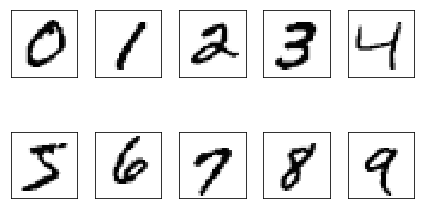

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

将其输入数据缩放到【0,1】区间，标签数据one-hot编码

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

定义一个最简单的CNN模型

In [0]:
def sample_model(activate='relu', dr=0):
  inputs = layers.Input((28, 28, 1))
  x = layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation=activate)(inputs)
  x = layers.Dropout(dr)(x)
  x = layers.MaxPooling2D()(x)
  x = layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation=activate)(x)
  x = layers.Dropout(dr)(x)
  x = layers.MaxPooling2D()(x)
  x = layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation=activate)(x)
  x = layers.Dropout(dr)(x)
  x = layers.AveragePooling2D(pool_size=(7, 7))(x)
  x = layers.Flatten()(x)
  x = layers.Dense(10, activation='softmax')(x)
  model = keras.Model(inputs, x)
  return model

对模型配置优化器、损失函数和评估指标，评估指标一般为精准度accuracy

In [18]:
model1 = sample_model()
model1.compile(optimizer=keras.optimizers.Adam(lr=1e-3),
                  loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model1.fit(x_train, y_train, batch_size=100, epochs=40, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
60000/60000 [==============================] - 3s 56us/sample - loss: 0.9453 - acc: 0.6962 - val_loss: 0.3417 - val_acc: 0.9017
Epoch 2/40
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3159 - acc: 0.9068 - val_loss: 0.2486 - val_acc: 0.9280
Epoch 3/40
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2291 - acc: 0.9327 - val_loss: 0.1718 - val_acc: 0.9494
Epoch 4/40
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1850 - acc: 0.9446 - val_loss: 0.1725 - val_acc: 0.9474
Epoch 5/40
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1571 - acc: 0.9531 - val_loss: 0.1595 - val_acc: 0.9484
Epoch 6/40
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1405 - acc: 0.9578 - val_loss: 0.1124 - val_acc: 0.9649
Epoch 7/40
60000/60000 [==============================] - 3s 49us/sa

使用swish激活函数进行模型训练

In [19]:
model2 = sample_model(activate=tf.nn.swish)
model2.compile(optimizer=keras.optimizers.Adam(lr=1e-3), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model2.fit(x_train, y_train, batch_size=100, epochs=40, validation_data=(x_test, y_test))

Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 4s 65us/sample - loss: 0.9301 - acc: 0.6996 - val_loss: 0.3122 - val_acc: 0.9140
Epoch 2/40
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2674 - acc: 0.9240 - val_loss: 0.2058 - val_acc: 0.9392
Epoch 3/40
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1868 - acc: 0.9454 - val_loss: 0.1607 - val_acc: 0.9521
Epoch 4/40
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1501 - acc: 0.9550 - val_loss: 0.1224 - val_acc: 0.9635
Epoch 5/40
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1260 - acc: 0.9619 - val_loss: 0.1049 - val_acc: 0.9691
Epoch 6/40
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1062 - acc: 0.9685 - val_loss: 0.0901 - val_acc: 0.9712
Epoch 7/40


使用激活函数swish，并使用dropout_rate为0.2

In [20]:
model3 = sample_model(activate=tf.nn.swish, dr=0.2)
model3.compile(optimizer=keras.optimizers.Adam(lr=1e-3), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model3.fit(x_train, y_train, batch_size=100, epochs=40, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 4s 70us/sample - loss: 1.1162 - acc: 0.6220 - val_loss: 0.5913 - val_acc: 0.8344
Epoch 2/40
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3568 - acc: 0.8954 - val_loss: 0.2756 - val_acc: 0.9333
Epoch 3/40
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2536 - acc: 0.9243 - val_loss: 0.2058 - val_acc: 0.9492
Epoch 4/40
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2113 - acc: 0.9368 - val_loss: 0.2171 - val_acc: 0.9377
Epoch 5/40
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1760 - acc: 0.9469 - val_loss: 0.1386 - val_acc: 0.9637
Epoch 6/40
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1534 - acc: 0.9544 - val_loss: 0.1853 - val_acc: 0.9439
Epoch 7/40
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1367 - acc: 0.9590 - val_loss: 0.

使用改造的CNN模型，经步长2替代最大池化操作

In [0]:
def model_cnn(activate='relu', dr=0):
  inputs = layers.Input((28, 28, 1))
  x = layers.Conv2D(16, (3,3), padding='same', activation=activate)(inputs)
  x = layers.Dropout(dr)(x)
  x = layers.Conv2D(32, (3,3), (2, 2), 'same', activation=activate)(x)
  x = layers.Dropout(dr)(x)
  x = layers.Conv2D(64, (3,3), (2, 2), 'same', activation=activate)(x)
  x = layers.Dropout(dr)(x)
  x = layers.AveragePooling2D(pool_size=(7, 7))(x)
  x = layers.Flatten()(x)
  x = layers.Dense(10, activation='softmax')(x)
  model = keras.Model(inputs, x)
  return model

In [36]:
model4 = model_cnn(activate=tf.nn.relu, dr=0)
model4.compile(optimizer=keras.optimizers.Adam(lr=1e-3), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model4.fit(x_train, y_train, batch_size=100, epochs=60, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 4s 63us/sample - loss: 1.3224 - acc: 0.5528 - val_loss: 0.7044 - val_acc: 0.7877
Epoch 2/60
60000/60000 [==============================] - 3s 53us/sample - loss: 0.5513 - acc: 0.8402 - val_loss: 0.3930 - val_acc: 0.8855
Epoch 3/60
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3596 - acc: 0.8960 - val_loss: 0.2716 - val_acc: 0.9211
Epoch 4/60
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2883 - acc: 0.9164 - val_loss: 0.2305 - val_acc: 0.9325
Epoch 5/60
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2443 - acc: 0.9274 - val_loss: 0.2092 - val_acc: 0.9378
Epoch 6/60
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2183 - acc: 0.9356 - val_loss: 0.1836 - val_acc: 0.9454
Epoch 7/60
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1990 - acc: 0.9399 - val_loss: 0.

In [37]:
model5 = model_cnn(activate=tf.nn.swish, dr=0)
model5.compile(optimizer=keras.optimizers.Adam(lr=1e-3), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model5.fit(x_train, y_train, batch_size=100, epochs=60, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 4s 70us/sample - loss: 1.5105 - acc: 0.4708 - val_loss: 0.9071 - val_acc: 0.7039
Epoch 2/60
60000/60000 [==============================] - 4s 62us/sample - loss: 0.7239 - acc: 0.7780 - val_loss: 0.5370 - val_acc: 0.8378
Epoch 3/60
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4849 - acc: 0.8566 - val_loss: 0.4009 - val_acc: 0.8804
Epoch 4/60
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3822 - acc: 0.8856 - val_loss: 0.3143 - val_acc: 0.9066
Epoch 5/60
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3092 - acc: 0.9071 - val_loss: 0.2861 - val_acc: 0.9149
Epoch 6/60
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2655 - acc: 0.9214 - val_loss: 0.2316 - val_acc: 0.9282
Epoch 7/60
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2339 - acc: 0.9307 - val_loss: 0.

将改造的cnn模型，卷积层进行标准高斯随机赋值

In [0]:
def model(activate='relu', dr=0):
  inputs = layers.Input((28, 28, 1))
  x = layers.Conv2D(16, (3,3), padding='same', kernel_initializer='normal', activation=activate)(inputs)
  x = layers.Dropout(dr)(x)
  x = layers.Conv2D(32, (3,3), (2, 2), 'same', kernel_initializer='normal', activation=activate)(x)
  x = layers.Dropout(dr)(x)
  x = layers.Conv2D(64, (3,3), (2, 2), 'same', kernel_initializer='normal', activation=activate)(x)
  x = layers.Dropout(dr)(x)
  x = layers.AveragePooling2D(pool_size=(7, 7))(x)
  x = layers.Flatten()(x)
  x = layers.Dense(10, kernel_initializer='normal', activation='softmax')(x)
  model = keras.Model(inputs, x)
  return model

In [40]:
model6 = model(activate=tf.nn.relu, dr=0)
model6.compile(optimizer=keras.optimizers.Adam(lr=1e-3), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model6.fit(x_train, y_train, batch_size=100, epochs=60, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 4s 64us/sample - loss: 1.4569 - acc: 0.4910 - val_loss: 0.9055 - val_acc: 0.7051
Epoch 2/60
60000/60000 [==============================] - 3s 53us/sample - loss: 0.6759 - acc: 0.7993 - val_loss: 0.4726 - val_acc: 0.8559
Epoch 3/60
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4512 - acc: 0.8668 - val_loss: 0.3825 - val_acc: 0.8815
Epoch 4/60
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3609 - acc: 0.8920 - val_loss: 0.2833 - val_acc: 0.9146
Epoch 5/60
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3070 - acc: 0.9079 - val_loss: 0.2640 - val_acc: 0.9182
Epoch 6/60
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2677 - acc: 0.9200 - val_loss: 0.2229 - val_acc: 0.9323
Epoch 7/60
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2400 - acc: 0.9283 - val_loss: 0.

In [41]:
model7 = model(activate=tf.nn.swish, dr=0)
model7.compile(optimizer=keras.optimizers.Adam(lr=1e-3), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model7.fit(x_train, y_train, batch_size=100, epochs=60, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 4s 75us/sample - loss: 1.7405 - acc: 0.3716 - val_loss: 1.1588 - val_acc: 0.6055
Epoch 2/60
60000/60000 [==============================] - 4s 65us/sample - loss: 0.9012 - acc: 0.7122 - val_loss: 0.6454 - val_acc: 0.8003
Epoch 3/60
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5798 - acc: 0.8240 - val_loss: 0.4823 - val_acc: 0.8484
Epoch 4/60
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4451 - acc: 0.8659 - val_loss: 0.3824 - val_acc: 0.8835
Epoch 5/60
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3671 - acc: 0.8892 - val_loss: 0.3138 - val_acc: 0.9020
Epoch 6/60
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3165 - acc: 0.9048 - val_loss: 0.3051 - val_acc: 0.9024
Epoch 7/60
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2806 - acc: 0.9144 - val_loss: 0.